# PROJET ENERGIE - MODELISATION AU NIVEAU REGIONAL
**Step 1 :**
Élaboration des premières itérations de modélisation.
Analysez vos premiers résultats, votre approche est-elle pertinente ? Et votre modèle ?

**Step 2 :**
Interprétation : Utilisez les métriques de Machine Learning et de statistiques afin d’exploiter et comprendre au mieux les résultats de votre modèle.
Optimisation : Essayer d’améliorer votre modèle à l’aide d’outils d’optimisation, vous pouvez essayer d’autres modèles plus complexes et comparer les résultats.
Conclusions scientifiques et métiers en fonction du succès ou de l’échec de la modélisation.

**Affichage du fichier de données nettoyées :**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/ProjetEnergie/df_nettoye.csv')

df = df.drop(columns=['Unnamed: 0'])

display(df)

Mounted at /content/gdrive


,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Production (MW),Energies renouvelables (MW),Année,Mois,Jour,TMin (°C),TMax (°C),TMoy (°C)
0,11,399184.0,14773.0,0.0,383.0,55.0,471.0,7091.0,22773.0,8000.0,2016,1,1,3.30,8.76,6.03
1,11,404152.0,14500.0,0.0,997.0,90.0,454.0,6736.0,22777.0,8277.0,2016,1,2,6.60,10.86,8.73
2,11,420933.0,14510.0,0.0,965.0,29.0,468.0,6915.0,22887.0,8377.0,2016,1,3,5.30,8.08,6.69
3,11,479017.0,19696.0,0.0,895.0,170.0,508.0,6559.0,27828.0,8132.0,2016,1,4,5.46,9.76,7.61
4,11,499664.0,19413.0,0.0,1047.0,64.0,552.0,7097.0,28173.0,8760.0,2016,1,5,5.12,9.00,7.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28099,93,191113.0,16212.0,0.0,1414.0,20074.0,40367.0,8988.0,87055.0,70843.0,2022,5,27,18.53,31.48,25.01
28100,93,184475.0,16048.0,0.0,2285.0,20473.0,39295.0,9099.0,87200.0,71152.0,2022,5,28,17.48,28.15,22.82
28101,93,174114.0,15541.0,0.0,1845.0,23181.0,34843.0,9951.0,85361.0,69820.0,2022,5,29,15.28,25.97,20.62
28102,93,187103.0,30813.0,0.0,77.0,17038.0,44177.0,8912.0,101017.0,70204.0,2022,5,30,12.43,24.97,18.70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28104 entries, 0 to 28103
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   28104 non-null  int64  
 1   Code INSEE région            28104 non-null  int64  
 2   Consommation (MW)            28104 non-null  float64
 3   Thermique (MW)               28104 non-null  float64
 4   Nucléaire (MW)               28104 non-null  float64
 5   Eolien (MW)                  28104 non-null  float64
 6   Solaire (MW)                 28104 non-null  float64
 7   Hydraulique (MW)             28104 non-null  float64
 8   Bioénergies (MW)             28104 non-null  float64
 9   Production (MW)              28104 non-null  float64
 10  Energies renouvelables (MW)  28104 non-null  float64
 11  Année                        28104 non-null  int64  
 12  Mois                         28104 non-null  int64  
 13  Jour            

In [ ]:
df.isna().sum().sum()

0

# **La régression**

**Premier test avec toutes les colonnes :**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_un = df.drop(columns=['Energies renouvelables (MW)','Production (MW)'])
df_un.head()

target_un = df_un['Consommation (MW)']
feats_un = df_un.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_un, target_un, test_size=0.25, random_state = 42)

cols = feats_un.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_l = lr.predict(X_test)
pred_l_train = lr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_l[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
19455     7188.193047
4884     21484.424405
10620   -24505.353454
11388     1987.759872
21845   -54675.310326
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.7595525470656085
Coefficient de détermination du modèle sur test: 0.7638238906953072


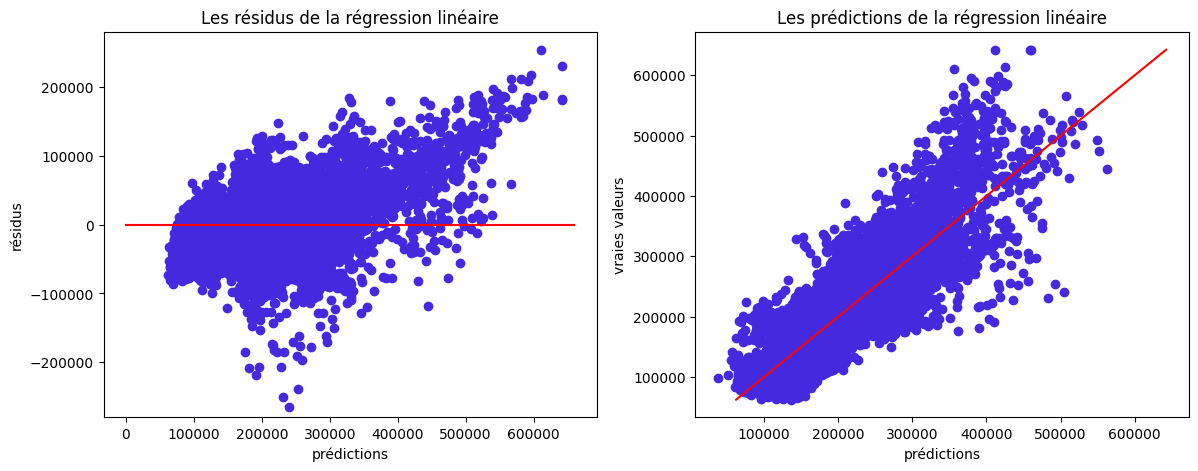

In [ ]:
residus_l = y_test - pred_l
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_l, color='#4529de')
plt.plot((0, 660000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-280000,280000])
plt.title('Les résidus de la régression linéaire')

plt.subplot(122)
plt.scatter(pred_l, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions de la régression linéaire')
plt.show()

In [ ]:
# On entraîne un modèle d'arbre de décision

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred_a = dtr.predict(X_test)
pred_a_train = dtr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_a[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     4132.0
4884     -2739.0
10620       -2.0
11388    -2639.0
21845    11811.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9545123093698434


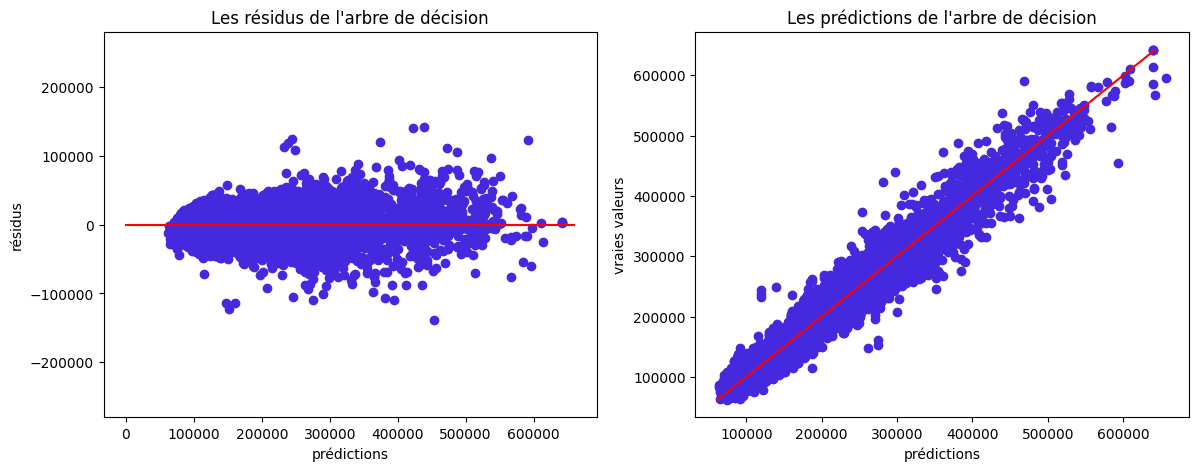

In [ ]:
residus_a = y_test - pred_a
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_a, color='#4529de')
plt.plot((0, 660000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-280000,280000])
plt.title('Les résidus de l\'arbre de décision')

plt.subplot(122)
plt.scatter(pred_a, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions de l\'arbre de décision')
plt.show()

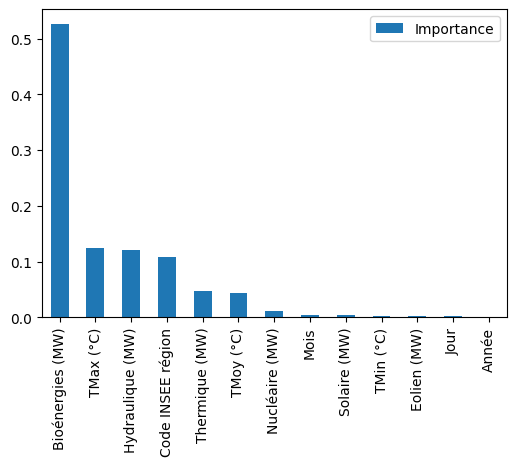

In [ ]:
# On utilise l'arbre de décision pour afficher l'importance des variables

import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(dtr.feature_importances_, index=feats_un.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4));

In [ ]:
# On teste l'arbre de décision avec différentes profondeurs d'arbre

from sklearn.tree import DecisionTreeRegressor
liste = list(range(1, 21))

for l in liste :
  dtr = DecisionTreeRegressor(random_state=42, max_depth=l)
  dtr.fit(X_train, y_train)
  print('max_depth = ', l)
  print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
  print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

# La profondeur optimale semble être de 15
# Coefficient de détermination sur train: 0.992391
# Coefficient de détermination sur test: 0.958311
# Ainsi notre R² n'est plus égal à 1 pour le train et pour la prédiction,
# il légèrement supérieur à celui que nous avions sans préciser le max_depth.

max_depth =  1
Coefficient de détermination du modèle sur train: 0.5204105469582117
Coefficient de détermination du modèle sur test: 0.5095953011305385
max_depth =  2
Coefficient de détermination du modèle sur train: 0.6668139197623476
Coefficient de détermination du modèle sur test: 0.6634739289555482
max_depth =  3
Coefficient de détermination du modèle sur train: 0.7877386791662468
Coefficient de détermination du modèle sur test: 0.7873556070655003
max_depth =  4
Coefficient de détermination du modèle sur train: 0.8814402091957607
Coefficient de détermination du modèle sur test: 0.8798670079559926
max_depth =  5
Coefficient de détermination du modèle sur train: 0.9121372704166664
Coefficient de détermination du modèle sur test: 0.9094592294513766
max_depth =  6
Coefficient de détermination du modèle sur train: 0.9311071017460149
Coefficient de détermination du modèle sur test: 0.9249799914521758
max_depth =  7
Coefficient de détermination du modèle sur train: 0.947504241256352
Coeff

In [5]:
# On entraîne un modèle de forêt aléatoire

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred_f = forest.predict(X_test)
pred_f_train = forest.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_f[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455    13246.23
4884      7657.22
10620     5753.13
11388   -14848.09
21845   -15778.78
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9967672536086191
Coefficient de détermination du modèle sur test: 0.9773906773794306


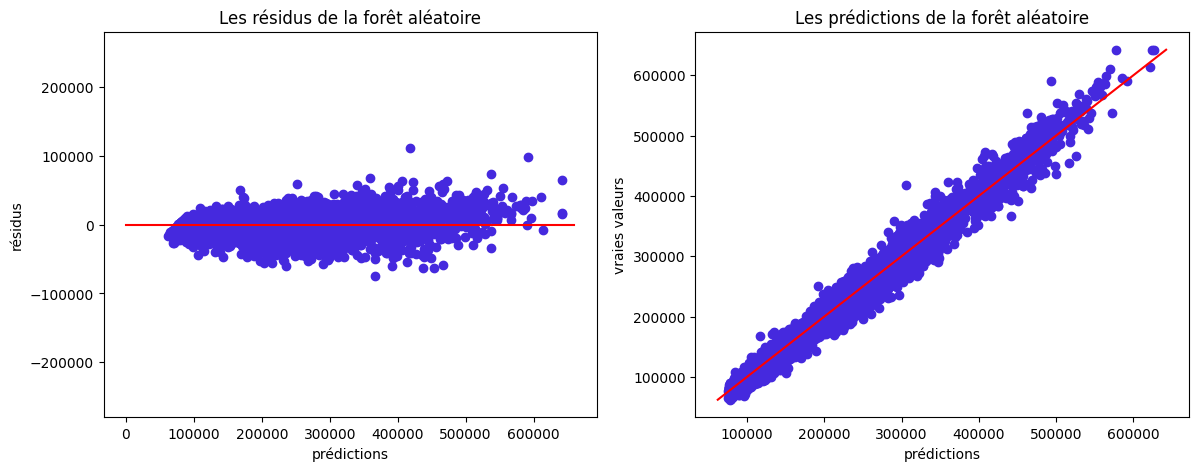

In [4]:
residus_f = y_test - pred_f
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_f, color='#4529de')
plt.plot((0, 660000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-280000,280000])
plt.title('Les résidus de la forêt aléatoire')

plt.subplot(122)
plt.scatter(pred_f, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions de la forêt aléatoire')
plt.show()

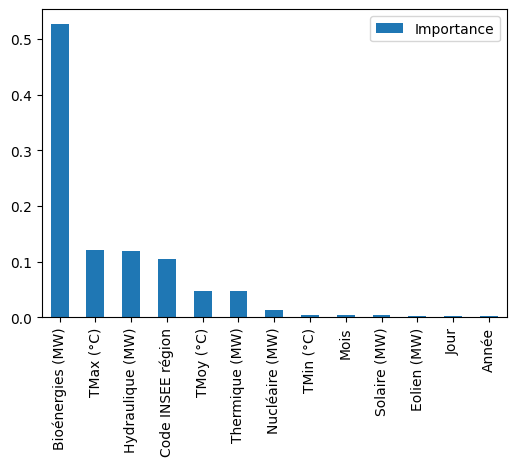

In [ ]:
# On utilise la forêt aléatoire pour afficher l'importance des variables

import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(forest.feature_importances_, index=feats_un.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4));

In [ ]:
# Les metrics de ces 3 modèles :

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lineaire = ['linéaire test', mean_absolute_error(y_test, pred_l), mean_squared_error(y_test, pred_l), np.sqrt(mean_squared_error(y_test, pred_l)), lr.score(X_test, y_test)]
arbre = ['arbre test', mean_absolute_error(y_test, pred_a), mean_squared_error(y_test, pred_a), np.sqrt(mean_squared_error(y_test, pred_a)), dtr.score(X_test,y_test)]
foret = ['forêt test', mean_absolute_error(y_test, pred_f), mean_squared_error(y_test, pred_f), np.sqrt(mean_squared_error(y_test, pred_f)), forest.score(X_test,y_test)]
lineaire_t = ['linéaire train', mean_absolute_error(y_train, pred_l_train), mean_squared_error(y_train, pred_l_train), np.sqrt(mean_squared_error(y_train, pred_l_train)), lr.score(X_train, y_train)]
arbre_t = ['arbre train', mean_absolute_error(y_train, pred_a_train), mean_squared_error(y_train, pred_a_train), np.sqrt(mean_squared_error(y_train, pred_a_train)), dtr.score(X_train, y_train)]
foret_t = ['forêt train', mean_absolute_error(y_train, pred_f_train), mean_squared_error(y_train, pred_f_train), np.sqrt(mean_squared_error(y_train, pred_f_train)), forest.score(X_train, y_train)]
tableau = [lineaire,lineaire_t,arbre,arbre_t,foret,foret_t]

dataF = pd.DataFrame(data=tableau, columns=['modèle','mae','mse','rmse','r²'])
display(dataF.set_index('modèle'))

,mae,mse,rmse,r²
modèle,,,,
linéaire test,36157.318621,2.393719e+09,48925.647228,0.763824
linéaire train,36461.250053,2.442412e+09,49420.765723,0.759553
arbre test,15066.038286,4.610320e+08,21471.656063,0.954512
arbre train,0.000000,0.000000e+00,0.000000,1.000000
forêt test,11211.078338,2.291526e+08,15137.786408,0.977391
forêt train,4168.782842,3.283752e+07,5730.403420,0.996767


On remarque qu'il y a un problème de surapprentissage flagrant pour le *DecisionTreeRegressor*. En effet, son coefficient de détermination pour le modèle d'entraînement est égal à 1. La forêt aléatoire semble la plus prometteuse. C'est le modèle que nous avons choisi d'optimiser par la suite.

**Deuxième test avec les énergies renouvelables :**

In [ ]:
df_deux = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Production (MW)'])
df_deux.head()

target_deux = df_deux['Consommation (MW)']
feats_deux = df_deux.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_deux, target_deux, test_size=0.25, random_state = 42)

cols = feats_deux.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
19455    123700.350338
4884     -30501.743185
10620     33361.924083
11388    -62389.765283
21845    -67108.331751
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.3966559851203618
Coefficient de détermination du modèle sur test: 0.39685098796617035


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455    35386.0
4884     -1026.0
10620     1676.0
11388    16545.0
21845    47226.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9504790802312802


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455    15514.22
4884      4119.66
10620     3394.21
11388    -3000.79
21845    19283.88
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9968255764651001
Coefficient de détermination du modèle sur test: 0.9776311031524939


**Troisième test avec seulement la production :**

In [ ]:
df_trois = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)'])
df_trois.head()

target_trois = df_trois['Consommation (MW)']
feats_trois = df_trois.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_trois, target_trois, test_size=0.25, random_state = 42)

cols = feats_trois.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
19455    60229.670986
4884     -4888.742559
10620    55077.705051
11388    18888.236927
21845    20788.980141
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.2124559538811871
Coefficient de détermination du modèle sur test: 0.2102360176564455


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455    17028.0
4884     -1026.0
10620     1676.0
11388    -7838.0
21845     2074.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9526390561579032


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     6164.96
4884      3631.48
10620    18432.28
11388   -13185.11
21845    -7716.94
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9964842608930949
Coefficient de détermination du modèle sur test: 0.9746152551958805


**Quatrième test avec seulement les températures :**

In [ ]:
df_quatre = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)',
                            'Production (MW)'])
df_quatre.head()

target_quatre = df_quatre['Consommation (MW)']
feats_quatre = df_quatre.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_quatre, target_quatre, test_size=0.25, random_state = 42)

cols = feats_quatre.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
19455    64815.112722
4884    -20709.535391
10620    51951.534801
11388    32282.026614
21845    16425.370895
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.1598808674858191
Coefficient de détermination du modèle sur test: 0.16622955576115828


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     6269.0
4884     -3510.0
10620    35521.0
11388   -32992.0
21845   -12471.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9449149169986388


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     8647.85
4884      1288.17
10620     9900.23
11388   -13554.76
21845    -2542.31
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9957805451294239
Coefficient de détermination du modèle sur test: 0.9697896158366011


**Cinquième test sans l'année :**

In [ ]:
df_cinq = df.drop(columns=['Année','Energies renouvelables (MW)', 'Production (MW)'])
df_cinq.head()

target_cinq = df_cinq['Consommation (MW)']
feats_cinq = df_cinq.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_cinq, target_cinq, test_size=0.25, random_state = 42)

cols = feats_cinq.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
19455    11058.943861
4884     30178.487011
10620   -25740.214911
11388    -3415.695572
21845   -49523.984475
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.7556886907628889
Coefficient de détermination du modèle sur test: 0.7606643790367476


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     6269.0
4884     -2589.0
10620       -2.0
11388    10178.0
21845   -43042.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9529322575865693


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455    14491.22
4884      7305.26
10620     7519.59
11388   -20846.59
21845   -12537.42
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9966656608826714
Coefficient de détermination du modèle sur test: 0.9764315111597244


**Sixième test avec les colonnes de l'attribut feature_importances_ :**

In [ ]:
df_six = df.drop(columns=['Année', 'Jour', 'Mois', 'Eolien (MW)', 'Nucléaire (MW)', 'Solaire (MW)', 'Energies renouvelables (MW)', 'Production (MW)', 'TMin (°C)'])
df_six.head()

target_six = df_six['Consommation (MW)']
feats_six = df_six.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_six, target_six, test_size=0.25, random_state = 42)

cols = feats_six.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
19455     4911.730151
4884     47260.219085
10620   -13881.525161
11388   -14343.989885
21845   -21785.731828
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.7142302752116187
Coefficient de détermination du modèle sur test: 0.714796725252906


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     6269.0
4884     -1026.0
10620     -229.0
11388    -7920.0
21845   -43042.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9422396206505119


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     2544.74
4884      5543.79
10620     5780.98
11388   -40332.02
21845   -13094.61
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9958014918295246
Coefficient de détermination du modèle sur test: 0.9707754853643643


**Compilation des résultats :**

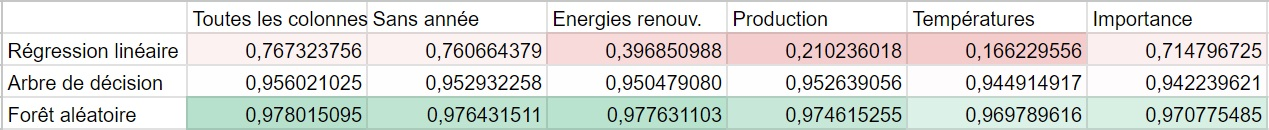

**Les courbes d'apprentissage des trois modèles :**

Modèle regression lineaire:
Erreur quadratique moyenne (MSE): 2390981579.76265
Erreur absolue moyenne (MAE): 36039.93191068033
Coefficient de détermination (R-squared): 0.7635442520444596
Modèle d'Arbre de Décision:
Erreur quadratique moyenne (MSE): 468021150.1391212
Erreur absolue moyenne (MAE): 15089.596513075965
Coefficient de détermination (R-squared): 0.9537151218345463
Modèle de Forêt Aléatoire:
Erreur quadratique moyenne (MSE): 223788357.65366
Erreur absolue moyenne (MAE): 11064.911834193204
Coefficient de détermination (R-squared): 0.9778684855037691


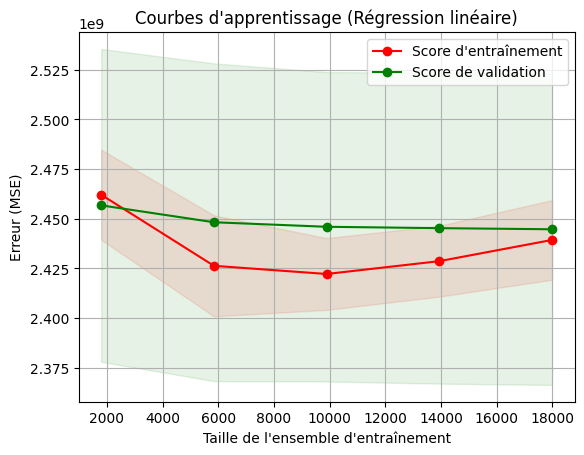

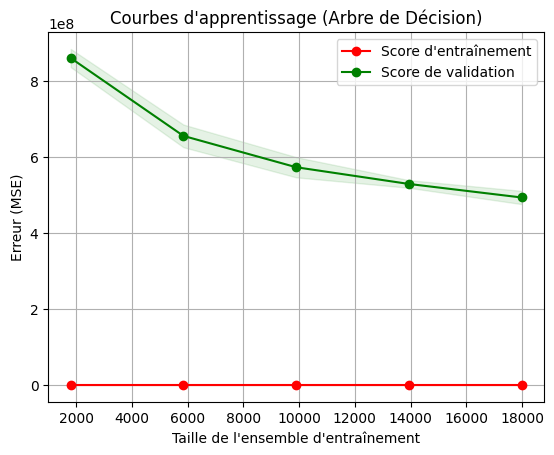

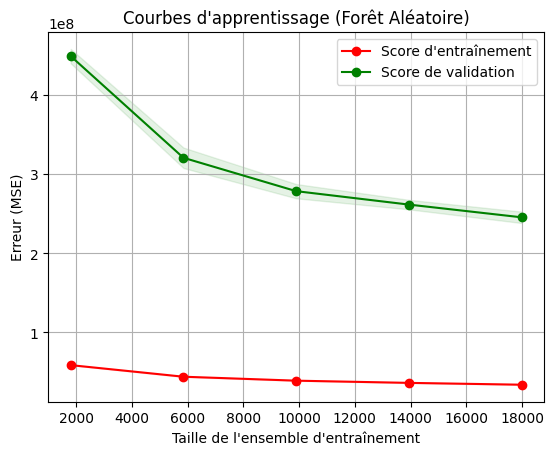

In [ ]:
X=df_un.drop('Consommation (MW)',axis=1)
y=df_un['Consommation (MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)

y_pred=reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modèle regression lineaire:")
print("Erreur quadratique moyenne (MSE):", mse)
print("Erreur absolue moyenne (MAE):", mae)
print("Coefficient de détermination (R-squared):", r2)

from sklearn.tree import DecisionTreeRegressor

# Créer un modèle d'arbre de décision
tree_reg = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle sur les données d'entraînement
tree_reg.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_tree = tree_reg.predict(X_test_scaled)

# Calculer les métriques de vérification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Modèle d'Arbre de Décision:")
print("Erreur quadratique moyenne (MSE):", mse_tree)
print("Erreur absolue moyenne (MAE):", mae_tree)
print("Coefficient de détermination (R-squared):", r2_tree)

from sklearn.ensemble import RandomForestRegressor

# Créer un modèle de forêt aléatoire
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
forest_reg.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_forest = forest_reg.predict(X_test_scaled)

# Calculer les métriques de vérification
mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Modèle de Forêt Aléatoire:")
print("Erreur quadratique moyenne (MSE):", mse_forest)
print("Erreur absolue moyenne (MAE):", mae_forest)
print("Coefficient de détermination (R-squared):", r2_forest)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Définir une fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(model, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Erreur (MSE)")

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

    plt.legend(loc="best")
    return plt

# Tracer les courbes d'apprentissage pour chaque modèle
title = "Courbes d'apprentissage (Régression linéaire)"
plot_learning_curve(reg, title, X_train_scaled, y_train, cv=None, n_jobs=-1)
plt.show()

title = "Courbes d'apprentissage (Arbre de Décision)"
plot_learning_curve(tree_reg, title, X_train_scaled, y_train, cv=None, n_jobs=-1)
plt.show()

title = "Courbes d'apprentissage (Forêt Aléatoire)"
plot_learning_curve(forest_reg, title, X_train_scaled, y_train, cv=None, n_jobs=-1)
plt.show()


## **Hyperparamètrage du modèle random forest regressor**

In [ ]:
X=df_un.drop('Consommation (MW)',axis=1)
y=df_un['Consommation (MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from joblib import parallel_backend
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Créez une instance du modèle Random Forest
random_forest = RandomForestRegressor(random_state=42)

# Définissez une distribution pour chaque hyperparamètre que vous souhaitez explorer
param_dist = {
    'n_estimators': randint(100, 500),  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': randint(2, 11),  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': randint(1, 5),  # Nombre minimum d'échantillons requis dans une feuille
    'max_features': ['sqrt', 'log2'] }  # Nombre maximum de caractéristiques à considérer pour le fractionnement

# Créez une instance de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# parallélisation pour accélérer la recherche aléatoire
with parallel_backend('loky', n_jobs=-1):
    random_search.fit(X_train_scaled, y_train)

# les meilleurs hyperparamètres
best_params = random_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# le modèle avec les meilleurs hyperparamètres
best_random_forest = random_search.best_estimator_

# Faire des prédictions avec le modèle optimisé
y_pred_best_rf = best_random_forest.predict(X_test_scaled)

# Calculer les métriques après optimisation
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Modèle de Random Forest Optimisé:")
print("Erreur quadratique moyenne (MSE) après optimisation:", mse_best_rf)
print("Erreur absolue moyenne (MAE) après optimisation:", mae_best_rf)
print("Coefficient de détermination (R-squared) après optimisation:", r2_best_rf)


Meilleurs hyperparamètres: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}
Modèle de Random Forest Optimisé:
Erreur quadratique moyenne (MSE) après optimisation: 218593173.0621212
Erreur absolue moyenne (MAE) après optimisation: 11211.418066004371
Coefficient de détermination (R-squared) après optimisation: 0.9783822624683249


Mean Squared Error (MSE): 218593173.0621212
Mean Absolute Error (MAE): 11211.418066004371
R-squared (R2): 0.9783822624683249


<ipython-input-8-7e592d5a14d4>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')


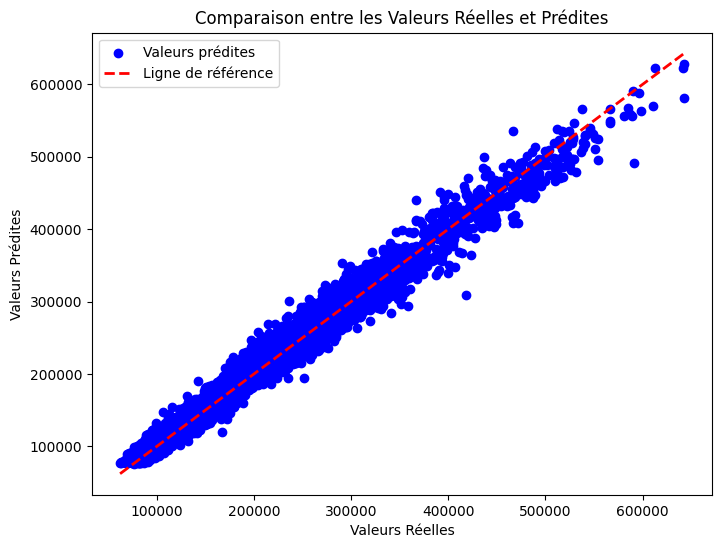

In [ ]:
# Créez une instance du modèle Random Forest avec les paramètres calculé ci dessus
random_forest = RandomForestRegressor(n_estimators=413, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42)

# Entraînez le modèle sur les données d'entraînement
random_forest.fit(X_train_scaled, y_train)

# Faites des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les mesures de performance
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
import matplotlib.pyplot as plt

# Réalisez des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Créez un graphique pour comparer les valeurs réelles et les valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Valeurs prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison entre les Valeurs Réelles et Prédites')
plt.legend()
plt.show()

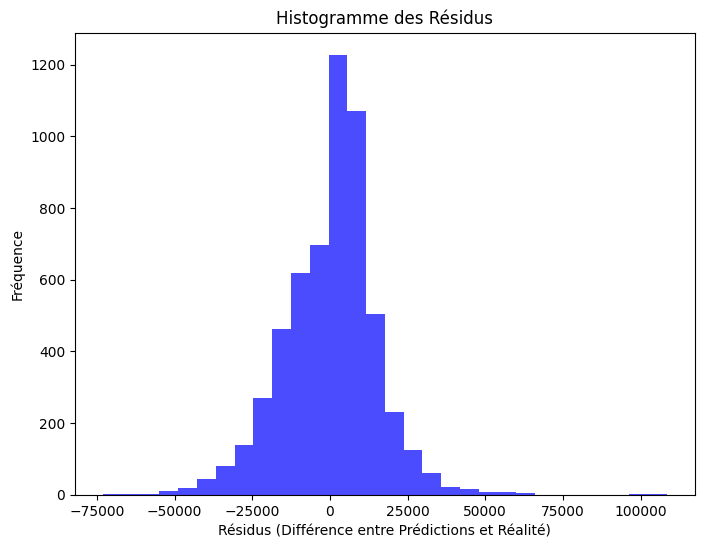

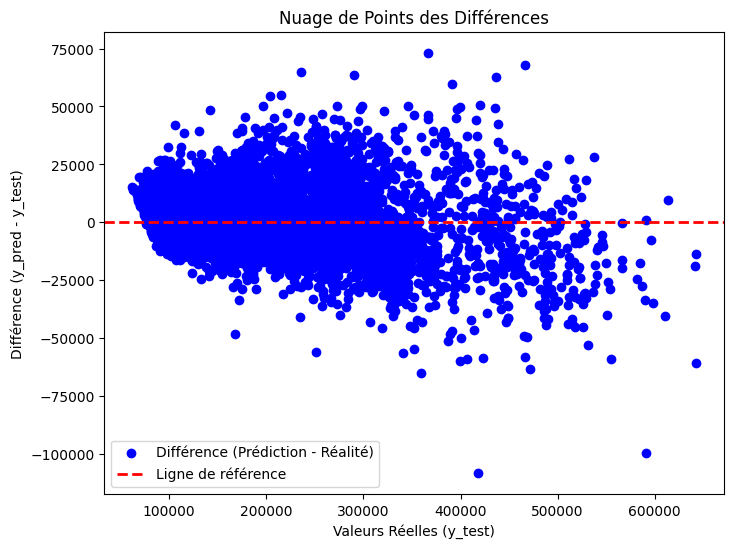

In [ ]:
# Créez un histogramme des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Résidus (Différence entre Prédictions et Réalité)')
plt.ylabel('Fréquence')
plt.title('Histogramme des Résidus')
plt.show()

# Calcul des différences entre les prédictions (y_pred) et les valeurs réelles (y_test)
differences = y_pred - y_test

# Créez un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, differences, c='blue', label='Différence (Prédiction - Réalité)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Ligne de référence')
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Différence (y_pred - y_test)')
plt.title('Nuage de Points des Différences')
plt.legend()
plt.show()


**DF2 : utilisation du random forest optimisé avec uniquement les features importantes**

Mean Squared Error (MSE): 509556383.02740526
Mean Absolute Error (MAE): 16879.36003238874
R-squared (R2): 0.9496075014989344


<ipython-input-23-03916d563b5c>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')


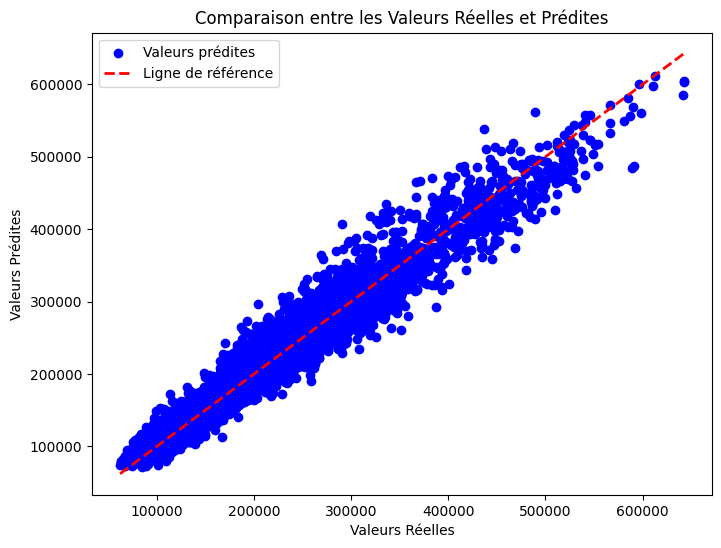

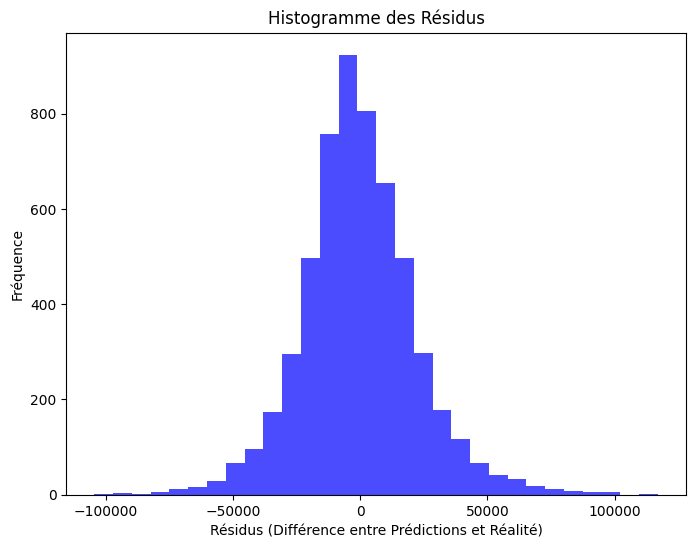

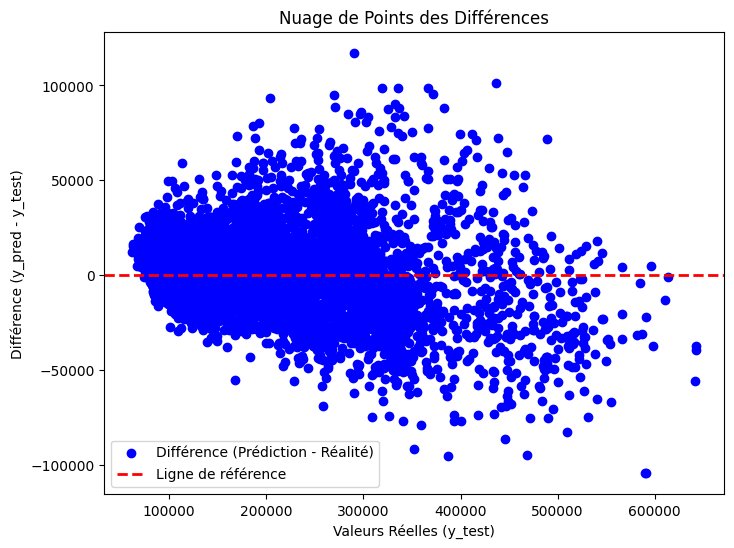

In [ ]:
df2 = df[['Hydraulique (MW)', 'TMin (°C)', 'Solaire (MW)', 'Code INSEE région', 'TMax (°C)','Consommation (MW)','Thermique (MW)']]

X=df2.drop('Consommation (MW)',axis=1)
y=df2['Consommation (MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Créez une instance du modèle Random Forest
random_forest = RandomForestRegressor(random_state=42)

# Créez une instance du modèle Random Forest avec les paramètres spécifiés
random_forest = RandomForestRegressor(n_estimators=413, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42)

# Entraînez le modèle sur les données d'entraînement
random_forest.fit(X_train_scaled, y_train)

# Faites des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les mesures de performance
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

import matplotlib.pyplot as plt

# Réalisez des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Créez un graphique pour comparer les valeurs réelles et les valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Valeurs prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison entre les Valeurs Réelles et Prédites')
plt.legend()
plt.show()

# Calcul des résidus
residuals = y_pred - y_test

# Créez un histogramme des résidus
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Résidus (Différence entre Prédictions et Réalité)')
plt.ylabel('Fréquence')
plt.title('Histogramme des Résidus')
plt.show()

# Calcul des différences entre les prédictions (y_pred) et les valeurs réelles (y_test)
differences = y_pred - y_test

# Créez un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, differences, c='blue', label='Différence (Prédiction - Réalité)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Ligne de référence')
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Différence (y_pred - y_test)')
plt.title ('Nuage de Points des Différences')
plt.legend()
plt.show()


**Le GradientBoostingRegressor**

In [ ]:
# On entraîne un modèle de GradientBoostingRegressor

df_gbr = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Production (MW)'])
target_gbr = df_gbr['Consommation (MW)']
feats_gbr = df_gbr.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_gbr, target_gbr, test_size=0.25, random_state = 42)

cols = feats_gbr.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=9, random_state=42, n_estimators=1400, learning_rate=0.05)
gbr.fit(X_train, y_train)
pred_g = gbr.predict(X_test)
pred_g_train = gbr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_g[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , gbr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", gbr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
19455     5888.943338
4884       689.840427
10620     3974.959219
11388     -482.145712
21845    27635.444388
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9996774335323158
Coefficient de détermination du modèle sur test: 0.9829448830143818


Temps : 4 min et 5 s.
Plus on affine les paramètres et plus le modèle met de temps à tourner.

In [ ]:
# Les métrics du GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

gradboost = ['gradboost test', mean_absolute_error(y_test, pred_g), mean_squared_error(y_test, pred_g), np.sqrt(mean_squared_error(y_test, pred_g)), gbr.score(X_test,y_test)]
gradboost_t = ['gradboost train', mean_absolute_error(y_train, pred_g_train), mean_squared_error(y_train, pred_g_train), np.sqrt(mean_squared_error(y_train, pred_g_train)),
               gbr.score(X_train, y_train)]
tableau = [gradboost,gradboost_t]

dataF = pd.DataFrame(data=tableau, columns=['modèle','mae','mse','rmse','r²'])
display(dataF.set_index('modèle'))

,mae,mse,rmse,r²
modèle,,,,
gradboost test,9692.281207,1.728590e+08,13147.583841,0.982945
gradboost train,1343.921628,3.276559e+06,1810.126760,0.999677


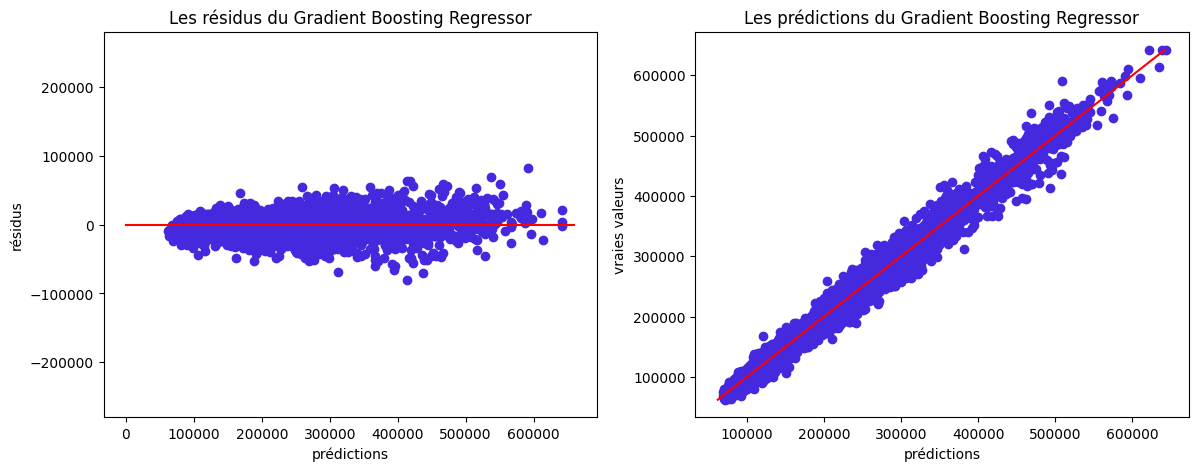

In [ ]:
residus_g = y_test - pred_g
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_g, color='#4529de')
plt.plot((0, 660000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-280000,280000])
plt.title('Les résidus du Gradient Boosting Regressor')

plt.subplot(122)
plt.scatter(pred_g, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions du Gradient Boosting Regressor')
plt.show()